<a href="https://colab.research.google.com/github/AndreaMagnanini/AI-School/blob/main/AI_Know.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

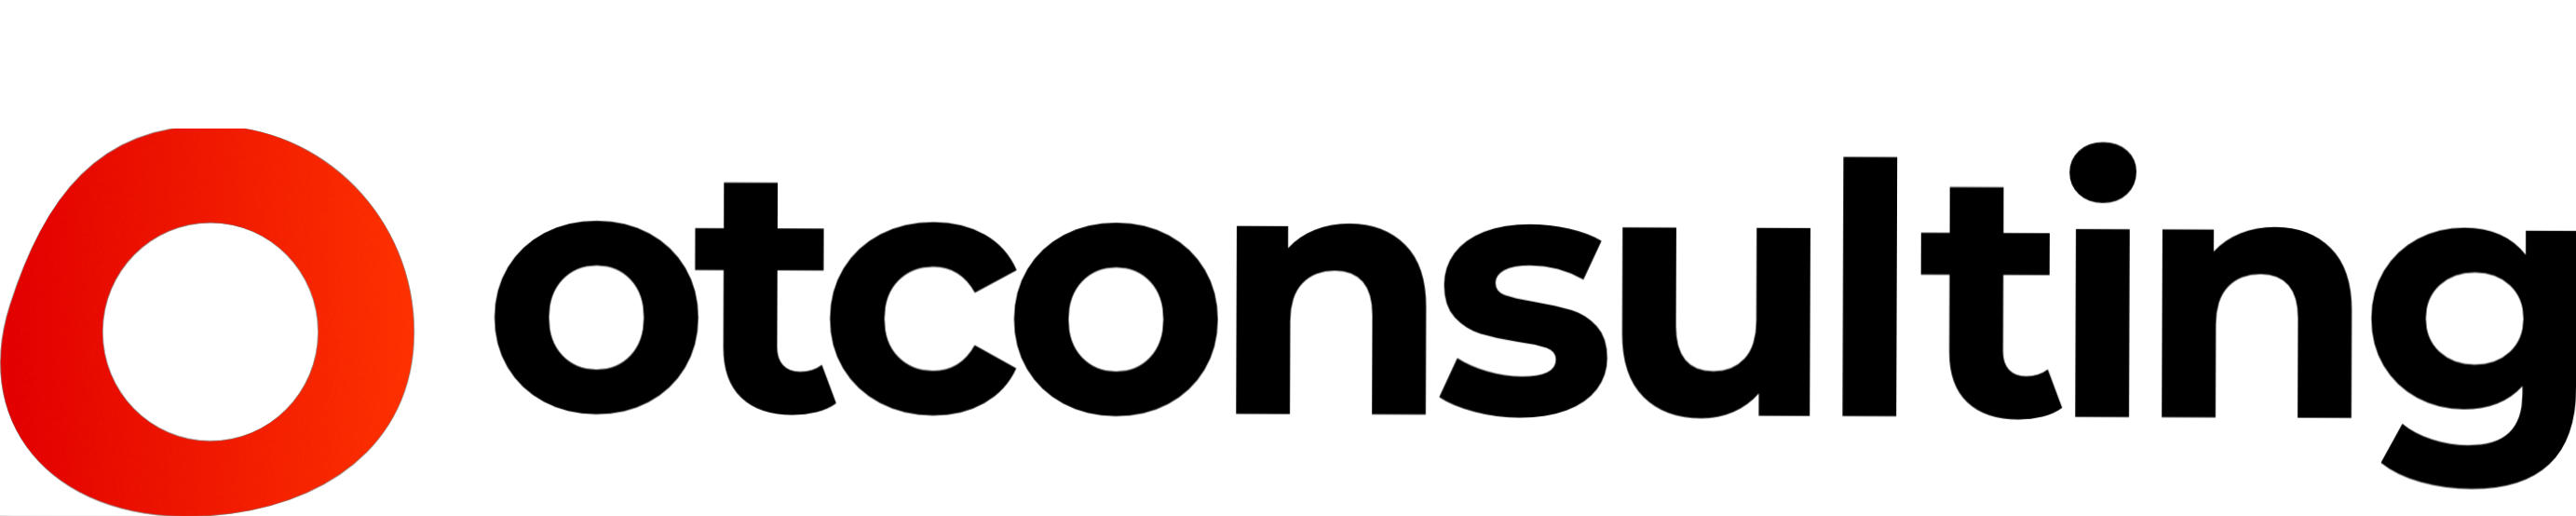

\begin{align}
  \text{}
\end{align}
\begin{align}
  \text{Progetto di}
\end{align}
\begin{align}
  \text{}
\end{align}
\begin{align}
  \huge \text{ Scaltriti Federico}
\end{align}
\begin{align}
  \text{}
\end{align}
\begin{align}
  \huge \text{ Magnanini Andrea}
\end{align}
\begin{align}
  \text{}
\end{align}
\begin{align}
 \text{per il Corso di Perfezionamento}
\end{align}
\begin{align}
  \text{}
\end{align}
<center>
<a href="https://aischools.it/"><img src="https://aischools.it/wp-content/uploads/2021/08/ai-logo.svg" width=400 /></a>
</center>

<div id="header" width=100%>
<table class="tfo-notebook-buttons" align="left" >
  <td>
    <a href="https://keras.io/"><img src="https://keras.io/img/logo.png" width="2050" >
      </a>
  </td>
  <td>
  <a href="https://www.tensorflow.org/"><img src="https://www.gstatic.com/devrel-devsite/prod/v24d520161c9661e427a3f6fa9973bfca56d0972dca82fa8ef65c709d915e80f3/tensorflow/images/lockup.svg"  width=2750 /></a>
  </td>
  <td>
     <a href="https://numpy.org/" ><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/31/NumPy_logo_2020.svg/2560px-NumPy_logo_2020.svg.png" width=1700 /></a>
  </td> 
  <td>
    <a href="https://pandas.pydata.org/"><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/ed/Pandas_logo.svg/2560px-Pandas_logo.svg.png" /></a>
  </td>
  <td>
    <a href="https://matplotlib.org/stable/index.html#"><img src="https://matplotlib.org/stable/_images/sphx_glr_logos2_003.png" width=2400 />
      </a>
  </td>
</table>
</div>


# <h3>Imports</h3>

In [ ]:
import tensorflow as tf
import keras
import pandas as pd
import numpy as np
import nltk
import os
import json

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords
nltk.download('stopwords')
STOPWORDS = set(stopwords.words('italian'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# $\text{AI - Know}$


<div id="header" width=100%>
<table class="tfo-notebook-buttons" align="left" >
  <td>
    <a href="https://8791503.fs1.hubspotusercontent-na1.net/hubfs/8791503/AI-Know-Entity%20Extraction%20e%20Text%20Classification%20sito-1.mp4"><img src="https://www.otconsulting.com/hs-fs/hubfs/Materiale%20Base/Banner%20prodotti%20sito%20(2).png?width=450&height=141&name=Banner%20prodotti%20sito%20(2).png" width="2050" >
      </a>
  </td>
  <td>
     <h5> AI-Know è un servizio proprietario prodotto da OT-Consulting, che </h5>
     <h5> fornisce un'interfaccia unificata per la creazione, analisi, fruizione, </h5>
     <h5> supervisione e benchmarking di modelli di Machine Learning,</h5> 
     <h5>selezionabili fra quelli resi disponibili per un determinato cliente.</h5>
     <h5>E' possibile vedere una <a href="https://8791503.fs1.hubspotusercontent-na1.net/hubfs/8791503/AI-Know-Entity%20Extraction%20e%20Text%20Classification%20sito-1.mp4">demo</a> cliccando sull'immagine a lato.</h5>
     <h5>Nel seguito ci concentreremo sul modello di Text Classification.</h5>

  </td>
</table>
</div>

<div>
<img src="https://www.otconsulting.com/hubfs/diru%202-1.png" width=100% >
</div>

# $\text{Il Modello}$

Il modello di text classification è essenzialmente una rete neurale convolutiva, che riceve in input il risultato della tokenizzazione di un testo, e restituisce una classificatione fra 14 possibili classi: \\
**"Change / cancel order", "Delivery errors", "FC Other",**
**"pick-up", "Fit and measurements", "Order information",**
**"Other", "Payment problems", "Products availability",**
**"Products info", "Return instructions and timings",**
**"Return procedure authorization", "Shipment progress",**
**"Undeliverable order"**. \\
Più nello specifico, il modello è destinato alla classificazione dell'oggetto di una e-mail.

## <h3>Struttura</h5>

In [ ]:
model_path = tf.keras.utils.get_file("model.h5", "https://github.com/AndreaMagnanini/AI-School/blob/main/Model.h5?raw=true")
model = tf.keras.models.load_model(model_path)
print(model.summary())
print(model)

2348760/2348760 [==============================] - 0s 0us/step
Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, 100, 64)           512064    
                                                                 
 dropout_27 (Dropout)        (None, 100, 64)           0         
                                                                 
 global_max_pooling1d_9 (Glo  (None, 64)               0         
 balMaxPooling1D)                                                
                                                                 
 dropout_28 (Dropout)        (None, 64)                0         
                                                                 
 dense_27 (Dense)            (None, 528)               34320     
                                                                 
 dropout_29 (Dropout)        (None, 528)               0 

## <h3>Dataset</h5>

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/AndreaMagnanini/AI-School/main/ds_italian.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25683 entries, 0 to 25682
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Case Number  25683 non-null  int64 
 1   Subject      25462 non-null  object
 2   Description  24271 non-null  object
 3   Subtype      25683 non-null  object
dtypes: int64(1), object(3)
memory usage: 802.7+ KB


In [ ]:
df.head()

,Case Number,Subject,Description,Subtype
0,414548,Re: Hai ricevuto il tuo ordine ? Numero d'ordi...,Oggi non ho ricevuto il mio ordine. Vi prego d...,C12
1,422829,Resi e rimborsi,"Devo rendere tutti i prodotti, ho provato 4 vo...",I1
2,422831,Ordine n. 37106113,Pacco reso a magazzino completamente macchiato...,O2
3,414551,Disponibilità e informazioni sul prodotto,Desidero sapere se la taglia M corrisponde all...,G3
4,422832,Resi e rimborsi,Vorrei rendere il cappotto acquistato perché d...,I1


In [ ]:
df["Subtype"]

0        C12
1         I1
2         O2
3         G3
4         I1
        ... 
25678     K3
25679     K3
25680     I1
25681     I1
25682     B4
Name: Subtype, Length: 25683, dtype: object

In [ ]:
df_reduced = df.groupby('Subtype').filter(lambda x: len(x) >= 500) 

<Figure size 7200x1440 with 0 Axes>

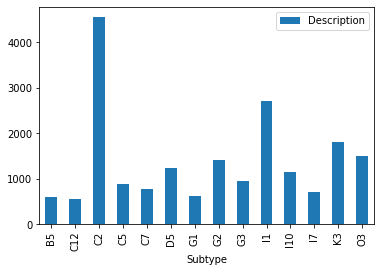

In [ ]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(100,20))
dataframe = df_reduced[["Description", "Subtype"]]
dataframe.head()
dataframe.groupby("Subtype").count().plot.bar(ylim=0)
plt.show()

In [ ]:
class_counter = [0]*len(df_reduced.Subtype.value_counts())
row_to_drop = []
dict_classes = {k:i for i,k in enumerate(df_reduced["Subtype"].unique())}

for i, row in df_reduced.iterrows():
  class_counter[dict_classes[row["Subtype"]]] += 1
  if class_counter[dict_classes[row["Subtype"]]] > 2500:
    row_to_drop.append(i)

print(df_reduced.shape)
df_reduced = df_reduced.drop(row_to_drop)
print(df_reduced.shape)

(20525, 4)
(17795, 4)


In [ ]:
df_reduced = df_reduced.fillna("")
df_reduced["Text"] = df_reduced["Subject"] + " " + df_reduced["Description"]
df_reduced = df_reduced.drop(["Subject", "Description"], axis=1)

df_reduced.head(5)

,Case Number,Subtype,Text
0,414548,C12,Re: Hai ricevuto il tuo ordine ? Numero d'ordi...
1,422829,I1,"Resi e rimborsi Devo rendere tutti i prodotti,..."
3,414551,G3,Disponibilità e informazioni sul prodotto Desi...
4,422832,I1,Resi e rimborsi Vorrei rendere il cappotto acq...
5,414553,C5,Resi e rimborsi vorrei rimborsare il prodotto ...


In [ ]:
map_letter_names = {
    'B5': 'FC Other',
    'C2': 'Order information',
    'C5': 'Change / cancel order',
    'C7': 'Shipment progress',
    'C12': 'Delivery errors',
    'D5': 'Payment problems',
    'G1': 'Products info',
    'G2': 'Products availability',
    'G3': 'Fit and measurements',
    'I1': 'Return procedure authorization',
    'I7': 'Return instructions and timings',
    'I10': 'Failed pick-up',
    'K3': 'Other',
    'O3': 'Undeliverable order'
}

for i, typee in enumerate(df_reduced["Subtype"]):
  df_reduced["Subtype"].iloc[i] = map_letter_names[typee]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
duplicated_df = df_reduced[df_reduced.duplicated(['Text'])]

grouped_duplicated = duplicated_df.groupby("Text")

In [ ]:
type_counts = df_reduced["Subtype"].value_counts(ascending=True)  # get counts of every type
least_sample_type = type_counts.index[0]  # get the type with the least n. of samples

for name, group in grouped_duplicated:  # for each group of samples grouped by the duplicated text
  group_types = group["Subtype"].unique()  # gets the unique types of the group
  if len(group_types) > 1:  # if the n. of types is greater than 1 => we have ambiguous classification to fix up
    least_group_type = df_reduced["Subtype"][df_reduced["Subtype"].isin(group_types)].value_counts(ascending=True).index[0]  # get the type with less samples IN THE GROUP
    
    for typee in group_types:  # for each type in the group
      duplicated_text = group["Text"].iloc[0]  # gets the text which I'm sure it's duplicated in different classes
      df_reduced.loc[(df_reduced['Subtype'] == typee) & (df_reduced["Text"] == duplicated_text), 'Subtype'] = least_group_type  # inplace op: run the re-assignment

<Figure size 7200x1440 with 0 Axes>

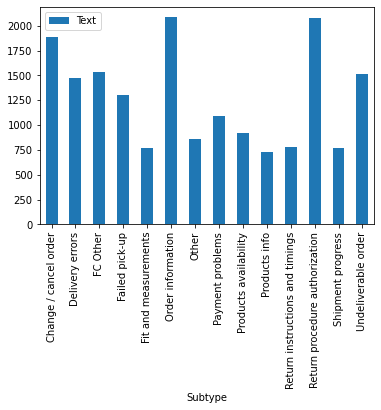

In [ ]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(100,20))
dataframe = df_reduced[["Text", "Subtype"]]
dataframe.head()
dataframe.groupby("Subtype").count().plot.bar(ylim=0)
plt.show()

##  <h3>Text Processing</h5>

In [ ]:
import re

REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('italian') + ['and', 'buongiorno', 'buonasera', 
                                              'buonpomeriggio', 'buon pomeriggio', 
                                              'buona sera', 'buon giorno', 
                                              'resi e rimborsi', 'ordini e spedizioni',
                                              'salve'])

def clean_text(text):
    """
        text: a string
        return: modified initial string
    """
    text = str(text).lower()
    text = REPLACE_BY_SPACE_RE.sub(' ', text)
    text = BAD_SYMBOLS_RE.sub('', text)

    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # remove stopwors from text
    return text

X = df_reduced["Text"]

X = X.apply(clean_text)
X = X.str.replace('\d+', '')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: FutureWarning: The default value of regex will change from True to False in a future version.


In [ ]:
y = pd.get_dummies(df_reduced['Subtype']).values
print('Shape of label tensor:', y.shape)  # asse y 2: le possibili labels
y

Shape of label tensor: (17795, 14)


array([[0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]], dtype=uint8)

## <h3>Tokenizer</h5>

In [ ]:
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 8000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 100
# This is fixed.
EMBEDDING_DIM = 64
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(X.values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 19708 unique tokens.


In [ ]:
X_seq = tokenizer.texts_to_sequences(X.values)
X_seq = pad_sequences(X_seq, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X_seq.shape)

Shape of data tensor: (17795, 100)


## <h3>Resources Saving</h3>

In [ ]:
import pickle

# saving tokenizer
with open('tokenizer_subtype_alm_bal_2.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)


In [ ]:
tf.keras.models.save_model(model, 'Model.h5', save_format='h5') # Saving the Model in H5 Format

In [ ]:
df_reduced.to_csv("df_reduced.csv")

## <h3>Evaluation</h3>

Questi risultati sono stati ottenuti utilizzando il dataset esaminato, opportunamente suddiviso il training e test set. La fase di addestramento è stata omessa per sinteticità, in quanto non oggetto di questo progetto: si vuole infatti solo mostrare come dare l'interpretazione di un modello già addestrato e utilizzabile, di cui non è possibile intaccare l'implementazione.

Performed on test set: \\
- **Precision**: 0.7719182685826756 \\
- **Recall**: 0.809894414935184 \\
- **F1-Score**: 0.7904504762488052

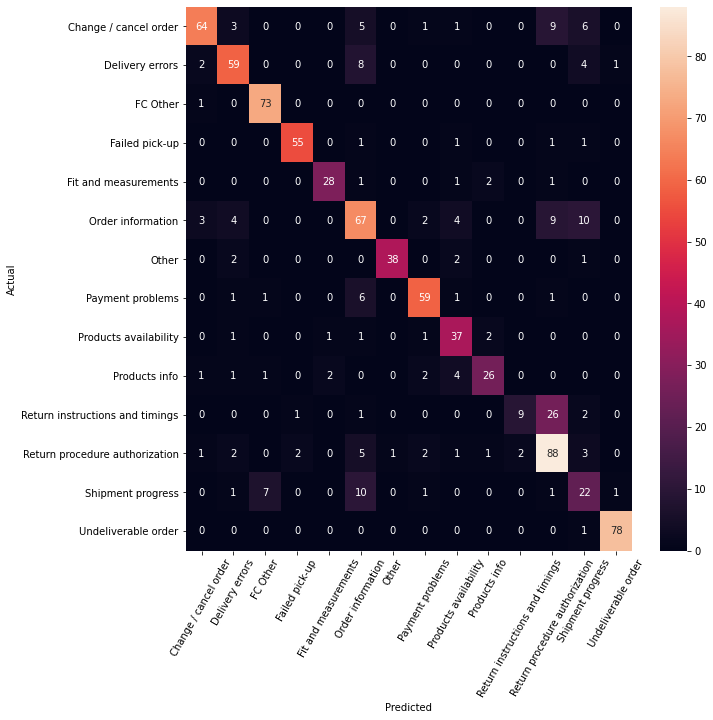